In [1]:
import malariagen_data
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
ag3 = malariagen_data.Ag3(pre=True)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8
Results cache           : None
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.8.0
Client location         : unknown
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

In [3]:
df_samples_ml_col = ag3.sample_metadata(
    sample_query="country == 'Mali' and taxon == 'coluzzii'"
)
df_samples_ml_col.groupby(["sample_set","cohort_admin2_month"]).size()

sample_set                        cohort_admin2_month        
1177-VO-ML-LEHMANN-VMF00004       ML-2_Banamba_colu_2012_06      10
                                  ML-2_Banamba_colu_2012_09       8
                                  ML-2_Banamba_colu_2012_10       8
                                  ML-2_Banamba_colu_2012_11       2
                                  ML-2_Banamba_colu_2014_05      16
                                  ML-2_Banamba_colu_2014_06      48
                                  ML-2_Banamba_colu_2014_09      13
                                  ML-2_Banamba_colu_2014_10      50
                                  ML-2_Banamba_colu_2015_04      48
                                  ML-2_Banamba_colu_2015_06      49
                                  ML-2_Banamba_colu_2015_09      49
                                  ML-2_Banamba_colu_2015_10      33
                                  ML-4_Niono_colu_2012_03         4
                                  ML-4_Niono_colu_2012

In [4]:
list_l = []
for (l, g) in df_samples_ml_col.groupby("cohort_admin2_month"):
    if len(g) >= 10:
        list_l.append(l)
list_l

['ML-2_Banamba_colu_2012_06',
 'ML-2_Banamba_colu_2014_05',
 'ML-2_Banamba_colu_2014_06',
 'ML-2_Banamba_colu_2014_09',
 'ML-2_Banamba_colu_2014_10',
 'ML-2_Banamba_colu_2015_04',
 'ML-2_Banamba_colu_2015_06',
 'ML-2_Banamba_colu_2015_09',
 'ML-2_Banamba_colu_2015_10',
 'ML-2_Kati_colu_2004_08',
 'ML-2_Kati_colu_2014_08',
 'ML-2_Kati_colu_2015_09',
 'ML-3_Yanfolila_colu_2012_10',
 'ML-4_Bla_colu_2004_08',
 'ML-4_Niono_colu_2013_03',
 'ML-4_Niono_colu_2013_04',
 'ML-4_Niono_colu_2013_10',
 'ML-4_Niono_colu_2014_04',
 'ML-4_Niono_colu_2015_04',
 'ML-4_Niono_colu_2015_10']

In [5]:
df_stats_ban_admin2_month_gamb = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'gambiae' and admin2_name == 'Banamba'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-2_Banamba_gamb_2012_09) has insufficient samples (5) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_gamb_2014_09) has insufficient samples (2) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_gamb_2015_09) has insufficient samples (6) for requested cohort size (10), dropping


Locate CDS_DEG_4 sites:   0%|          | 0/448 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

In [6]:
df_stats_ban_admin2_month_col = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'coluzzii' and admin2_name == 'Banamba'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-2_Banamba_colu_2012_09) has insufficient samples (8) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2012_10) has insufficient samples (8) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2012_11) has insufficient samples (2) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2014_08) has insufficient samples (1) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2015_07) has insufficient samples (3) for requested cohort size (10), dropping


Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

In [7]:
def plot_diversity_stats(
    df_stats, 
    color=None, 
    height=450, 
    template="plotly_white"
):

    # set up common plotting parameters
    hover_name = "cohort"
    hover_data = [
        "taxon",
        "country",
        "admin1_iso",
        "admin1_name",
        "admin2_name",
        "year",
        "month",
    ]
    labels = {
        'theta_pi_estimate': r'$\widehat{\theta}_{\pi}$',
        'theta_w_estimate': r'$\widehat{\theta}_{w}$',
        'tajima_d_estimate': r'$D$',
        'cohort': "Cohort",
        'taxon': 'Taxon',
        'country': "Country",
    }
    category_orders = {
        "taxon": ["arabiensis", "gambiae", "gcx3", "coluzzii", "gcx1", "gcx2"],
    }
    width = 300 + 30 * len(df_stats)

    # nucleotide diversity bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_pi_estimate",
        error_y="theta_pi_ci_err",
        title="Nucleotide diversity",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # watterson estimator bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_w_estimate",
        error_y="theta_w_ci_err",
        title="Watterson estimator",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # tajima's d bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="tajima_d_estimate",
        error_y="tajima_d_ci_err",
        title="Tajima's D",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # scatter plot comparing diversity estimators
    fig = px.scatter(
        data_frame=df_stats,
        x="theta_pi_estimate",
        y="theta_w_estimate",
        error_x="theta_pi_ci_err",
        error_y="theta_w_ci_err",
        title="Diversity estimators",
        color=color,
        width=500,
        height=500,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

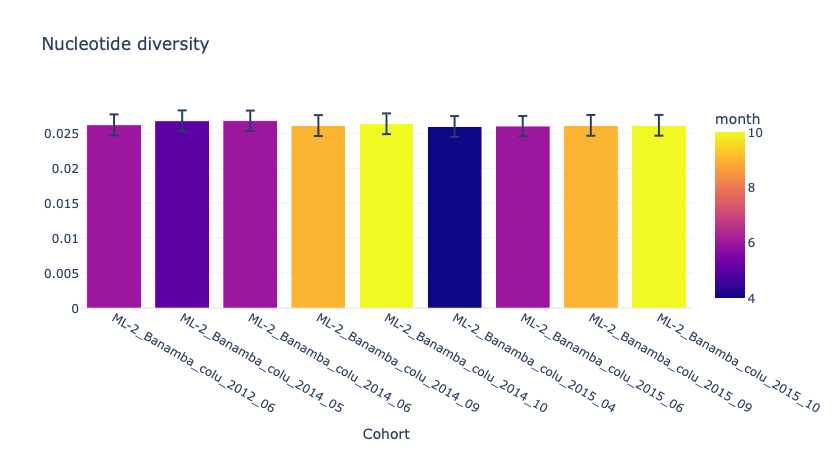

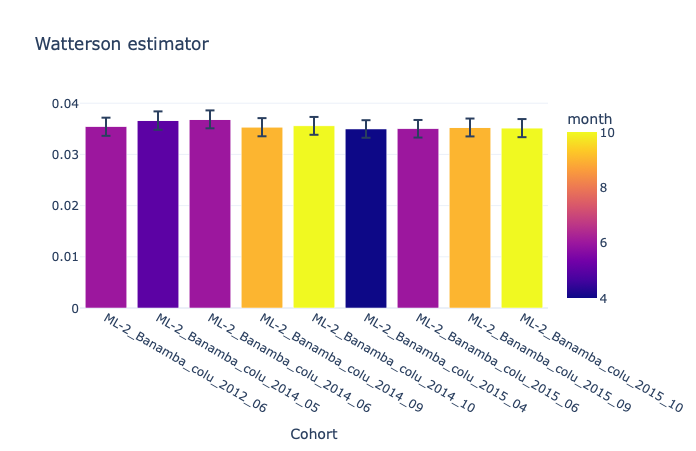

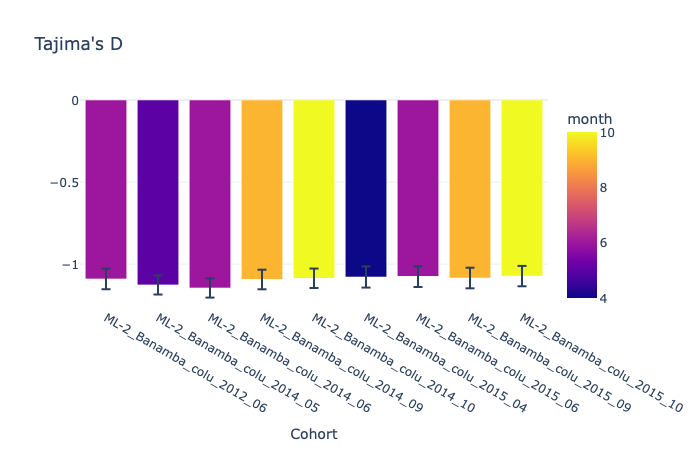

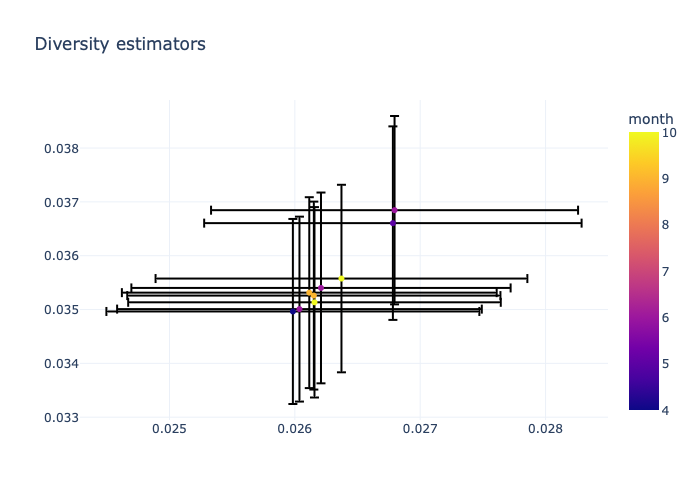

In [13]:
plot_diversity_stats(df_stats_ban_admin2_month_col, color="month")

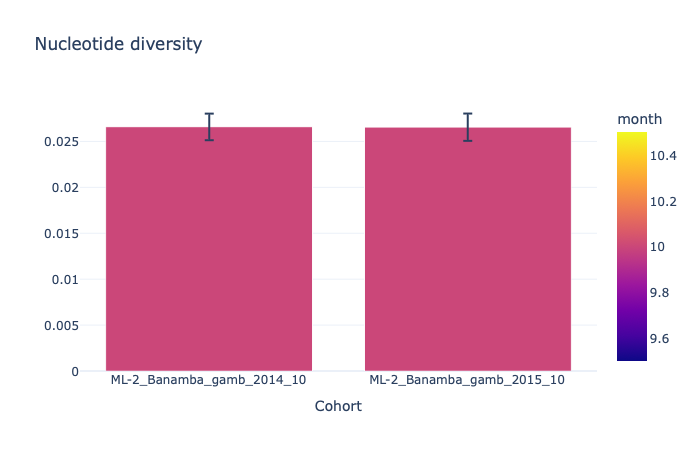

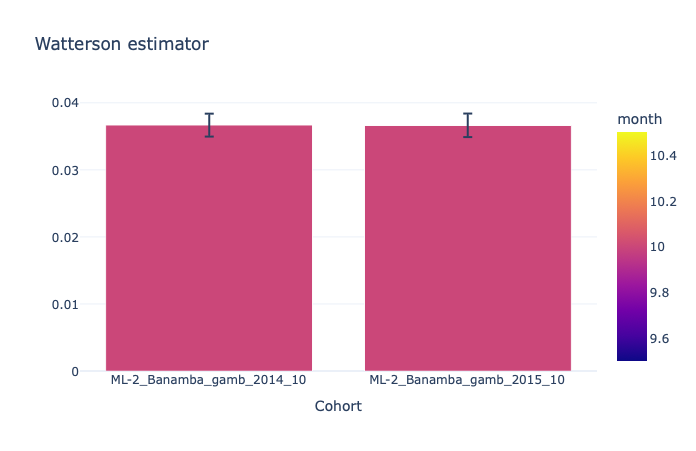

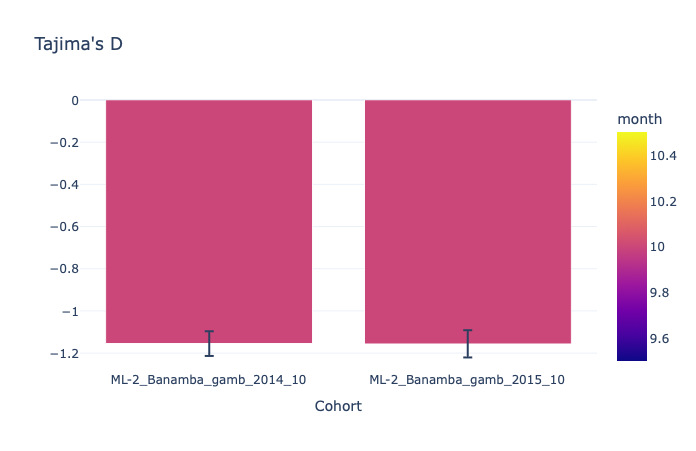

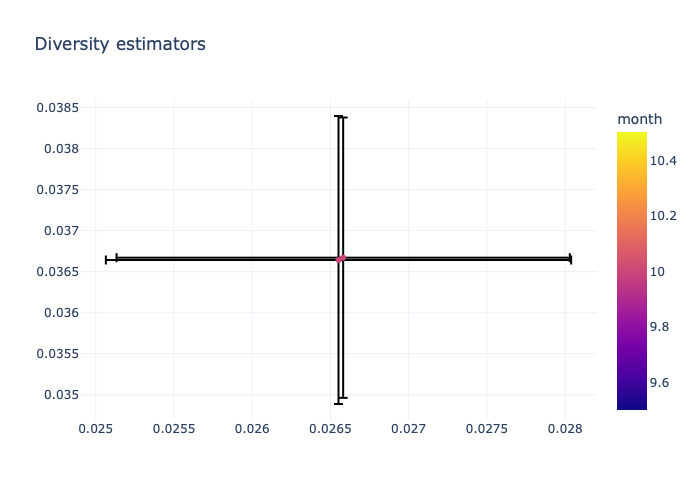

In [12]:
plot_diversity_stats(df_stats_ban_admin2_month_gamb, color="month")

In [10]:
df_stats_kat_admin2_month_col = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'coluzzii' and admin2_name == 'Kati'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-2_Kati_colu_2014_11) has insufficient samples (3) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Kati_colu_2014_12) has insufficient samples (5) for requested cohort size (10), dropping


Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

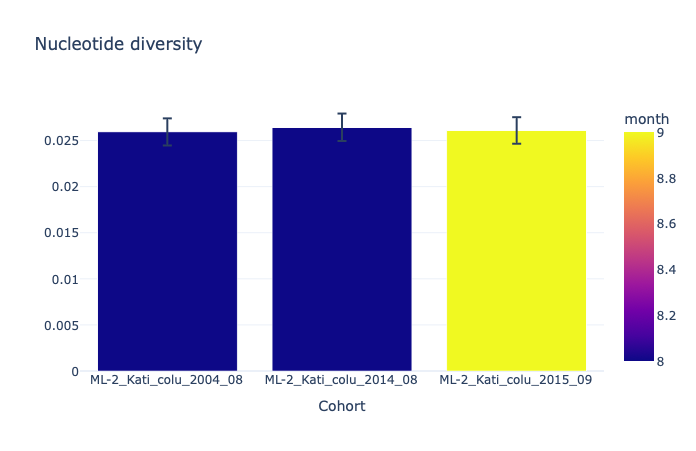

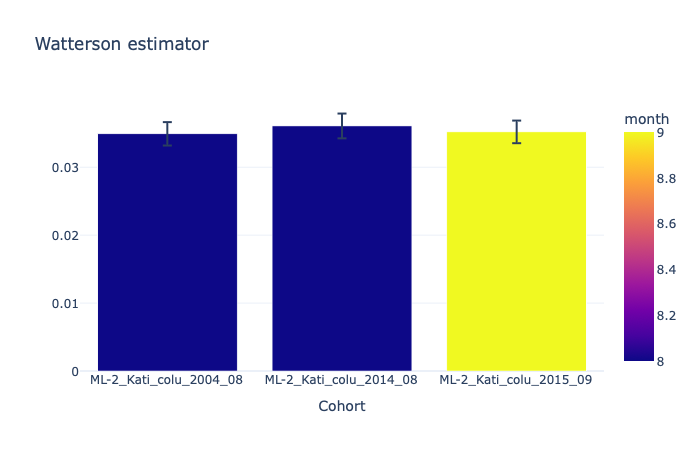

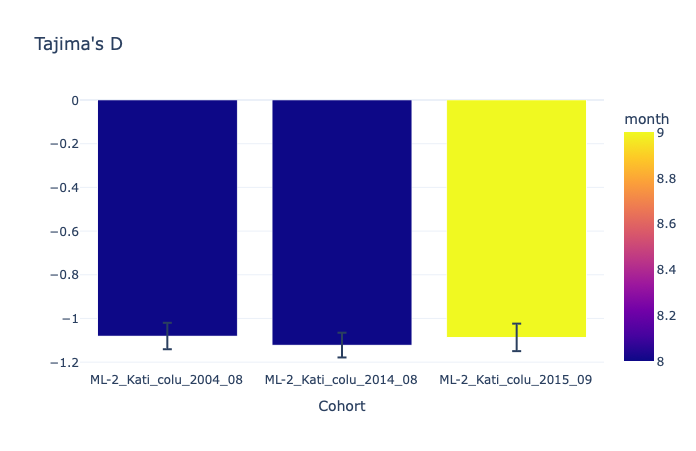

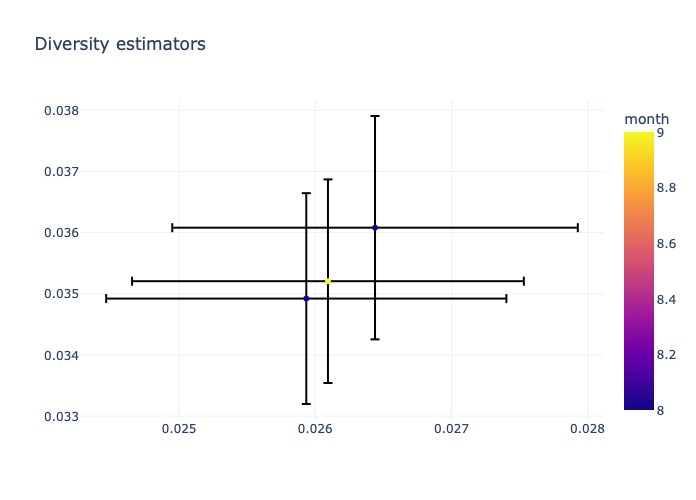

In [11]:
plot_diversity_stats(df_stats_kat_admin2_month_col, color="month")

In [14]:
df_stats_nio_admin2_month_col = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'coluzzii' and admin2_name == 'Niono'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-4_Niono_colu_2012_03) has insufficient samples (4) for requested cohort size (10), dropping
[INFO] cohort (ML-4_Niono_colu_2012_04) has insufficient samples (2) for requested cohort size (10), dropping
[INFO] cohort (ML-4_Niono_colu_2012_09) has insufficient samples (3) for requested cohort size (10), dropping
[INFO] cohort (ML-4_Niono_colu_2012_10) has insufficient samples (6) for requested cohort size (10), dropping
[INFO] cohort (ML-4_Niono_colu_2012_11) has insufficient samples (8) for requested cohort size (10), dropping


Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

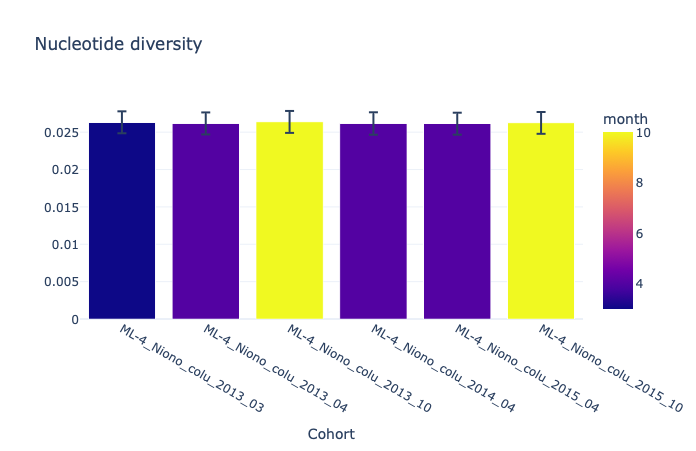

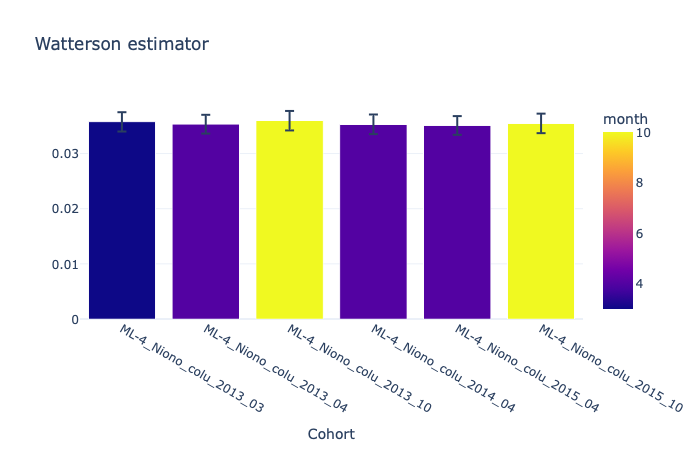

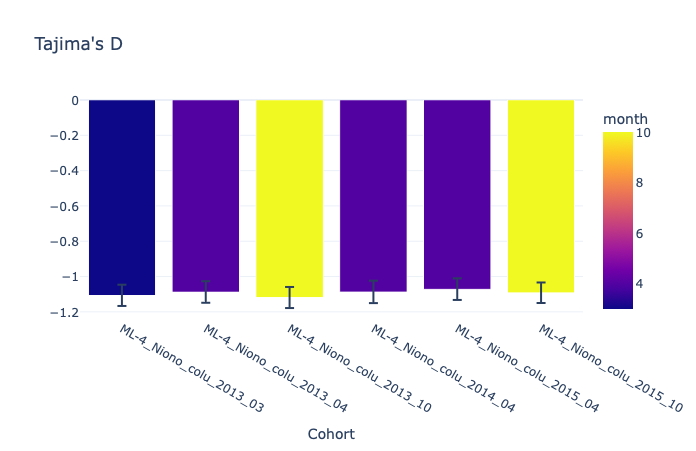

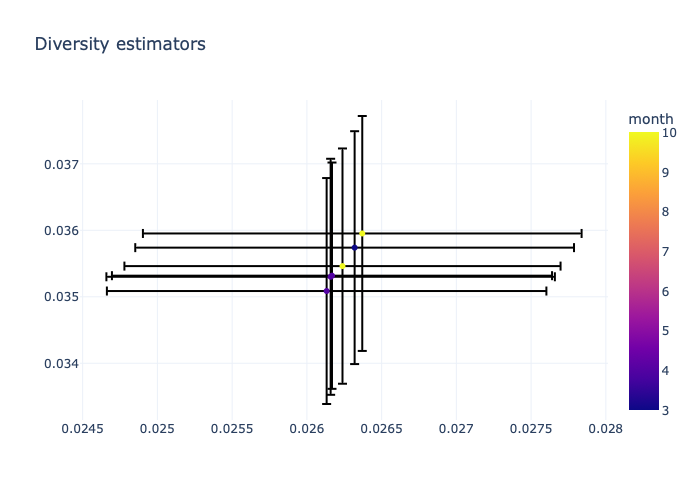

In [15]:
plot_diversity_stats(df_stats_nio_admin2_month_col, color="month")

In [17]:
df_stats_admin2_month_col = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'coluzzii'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-2_Banamba_colu_2012_09) has insufficient samples (8) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2012_10) has insufficient samples (8) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2012_11) has insufficient samples (2) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2014_08) has insufficient samples (1) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_colu_2015_07) has insufficient samples (3) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Kati_colu_2014_11) has insufficient samples (3) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Kati_colu_2014_12) has insufficient samples (5) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Nara_colu_2013_08) has insufficient samples (4) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Nara_colu_2014_08) has insufficient samples (4) for requested cohort size (10), dropping
[INF

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

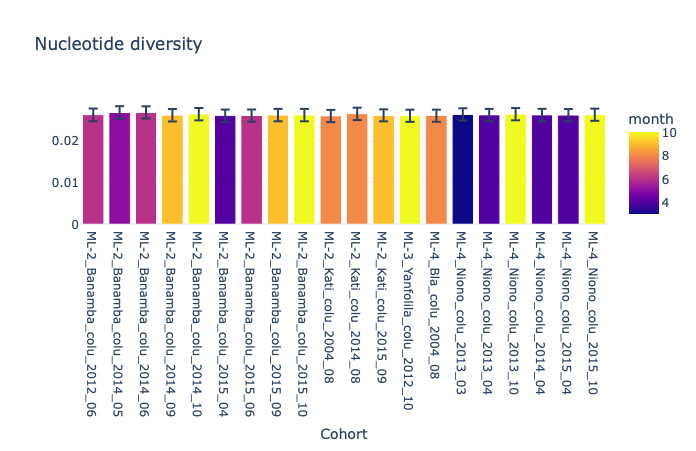

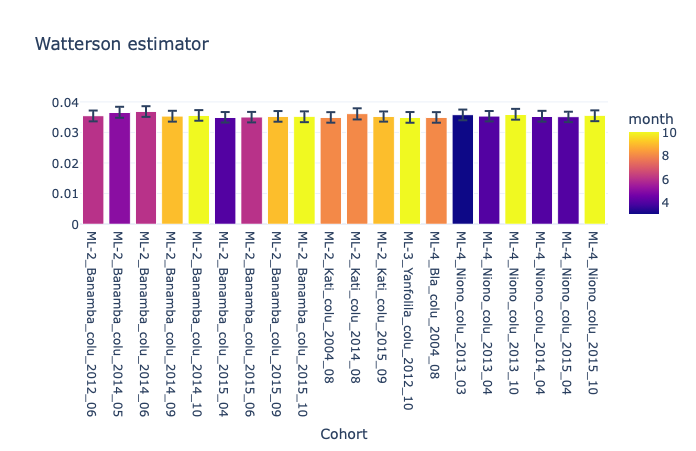

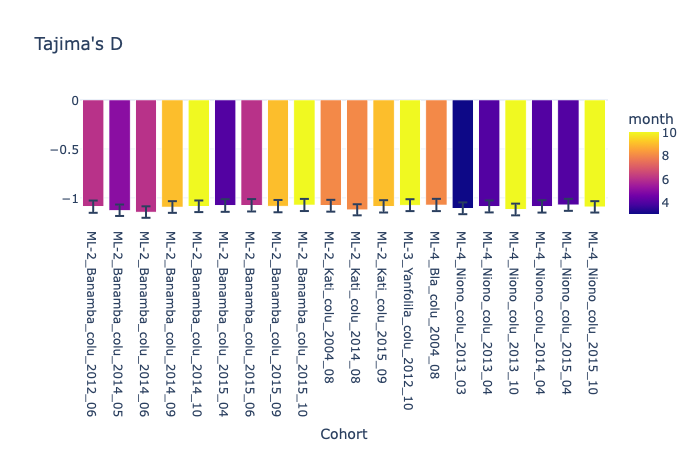

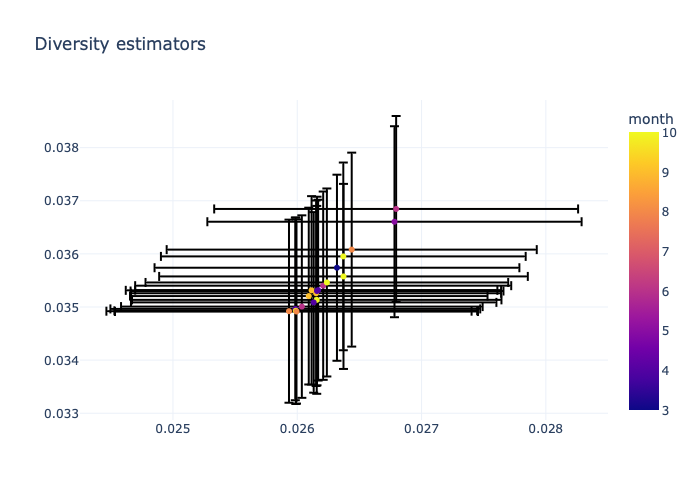

In [18]:
plot_diversity_stats(df_stats_admin2_month_col, color="month")

In [19]:
df_stats_admin2_month_gamb = ag3.diversity_stats(
    sample_query="country == 'Mali' and taxon == 'gambiae'",
    cohorts="admin2_month",
    cohort_size=10,
    region="3L:15,000,000-41,000,000",
    site_mask="gamb_colu",
    site_class="CDS_DEG_4",
)

[INFO] cohort (ML-2_Banamba_gamb_2012_09) has insufficient samples (5) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_gamb_2014_09) has insufficient samples (2) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Banamba_gamb_2015_09) has insufficient samples (6) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Kati_gamb_2004_08) has insufficient samples (9) for requested cohort size (10), dropping
[INFO] cohort (ML-2_Kati_gamb_2014_12) has insufficient samples (3) for requested cohort size (10), dropping
[INFO] cohort (ML-4_Baroueli_gamb_2004_08) has insufficient samples (1) for requested cohort size (10), dropping


Compute SNP allele counts:   0%|          | 0/1245 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/498 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1577 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/913 [00:00<?, ?it/s]

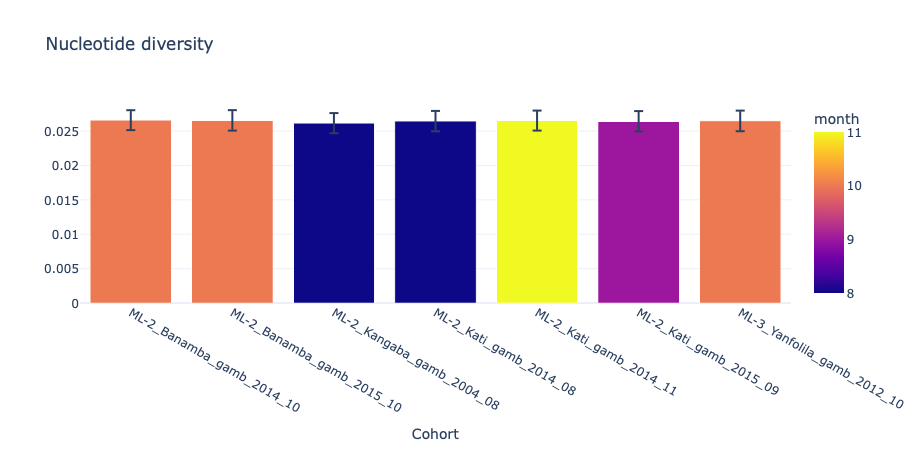

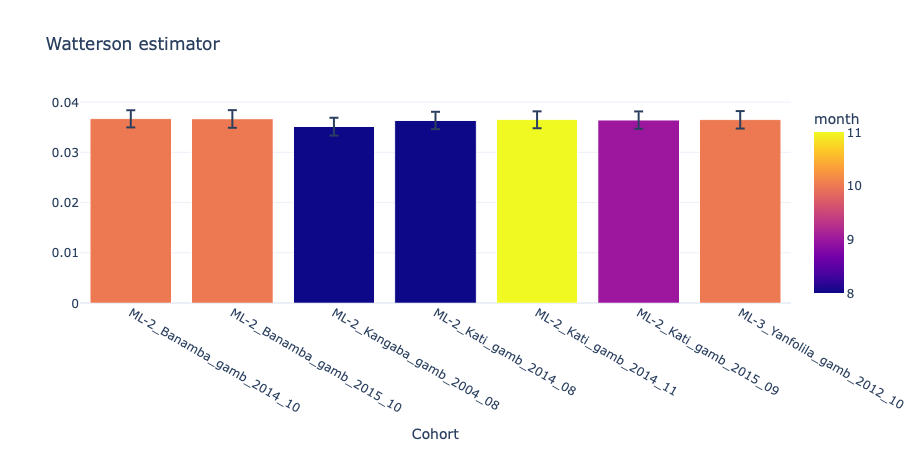

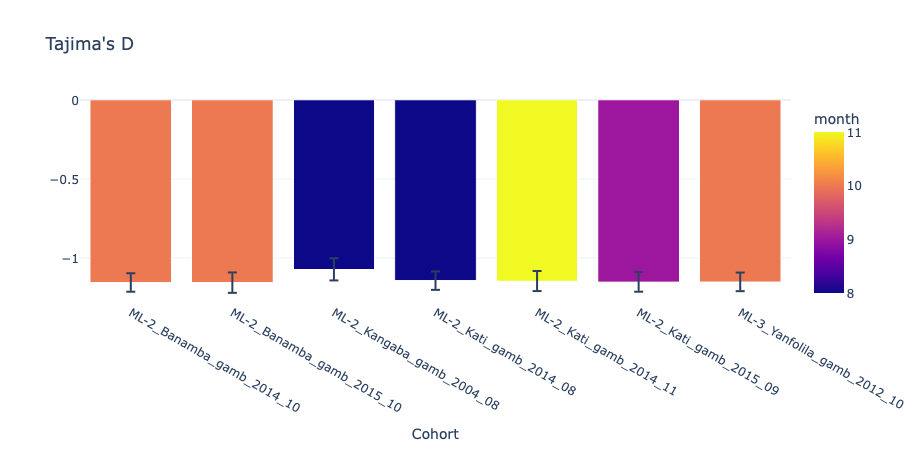

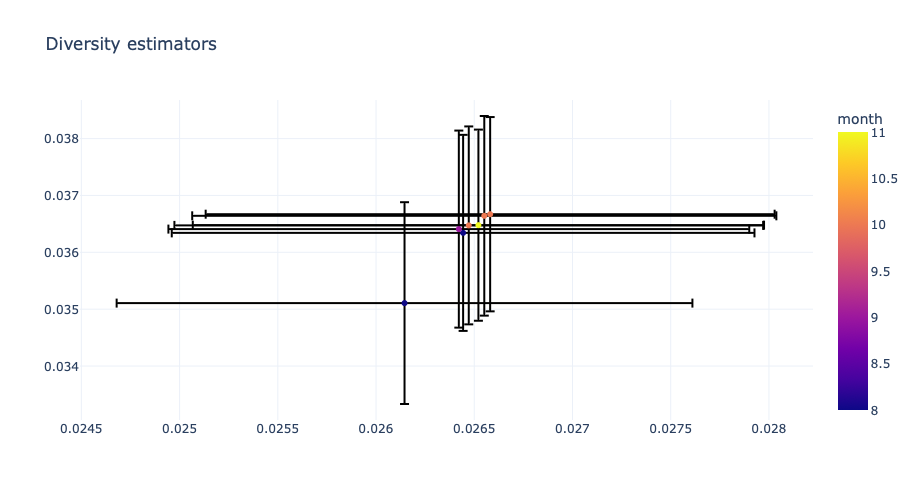

In [ ]:
plot_diversity_stats(df_stats_admin2_month_gamb, color="month")

In [23]:
df_samples_ml = ag3.sample_metadata(
    sample_query="country == 'Mali'"
)
df_samples_ml.groupby(["sample_set","cohort_admin2_month"]).size()

sample_set                   cohort_admin2_month       
1177-VO-ML-LEHMANN-VMF00004  ML-2_Banamba_arab_2012_10      1
                             ML-2_Banamba_arab_2014_09      1
                             ML-2_Banamba_arab_2014_10     15
                             ML-2_Banamba_arab_2015_06      1
                             ML-2_Banamba_arab_2015_09      2
                                                           ..
AG1000G-ML-B                 ML-4_Baroueli_arab_2004_08     1
                             ML-4_Baroueli_colu_2004_08     6
                             ML-4_Baroueli_gamb_2004_08     1
                             ML-4_Bla_arab_2004_08          1
                             ML-4_Bla_colu_2004_08         19
Length: 65, dtype: int64

In [39]:
gps = df_samples_ml.groupby(["sample_set","cohort_admin2_month"]).groups

In [45]:
for k in gps.keys():
    if gps[k].size >= 10:
        print(str(k) + ': ' + str(gps[k].size))

('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_arab_2014_10'): 15
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2012_06'): 10
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2014_05'): 16
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2014_06'): 48
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2014_09'): 13
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2014_10'): 50
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2015_04'): 48
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2015_06'): 49
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2015_09'): 49
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_colu_2015_10'): 33
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_gamb_2014_10'): 14
('1177-VO-ML-LEHMANN-VMF00004', 'ML-2_Banamba_gamb_2015_10'): 17
('1177-VO-ML-LEHMANN-VMF00004', 'ML-4_Niono_colu_2013_03'): 12
('1177-VO-ML-LEHMANN-VMF00004', 'ML-4_Niono_colu_2013_04'): 16
('1177-VO-ML-LEHMANN-VMF00004', 'ML-4_Niono_colu_2013_10'): 45
('1177-VO-ML-LEHMANN-VMF00004',

In [32]:
stats_df

,cohort,theta_pi,theta_pi_estimate,theta_pi_bias,theta_pi_std_err,theta_pi_ci_err,theta_pi_ci_low,theta_pi_ci_upp,theta_w,theta_w_estimate,...,tajima_d_ci_upp,taxon,year,month,country,admin1_iso,admin1_name,admin2_name,longitude,latitude
ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_06,0.026207,0.026209,-0.000002,0.000386,0.001513,0.025452,0.026965,0.035398,0.035401,...,-1.058732,coluzzii,2012,6,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2014_05,ML-2_Banamba_colu_2014_05,0.02678,0.026782,-0.000002,0.000384,0.001505,0.026029,0.027535,0.036603,0.036605,...,-1.097262,coluzzii,2014,5,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2014_06,ML-2_Banamba_colu_2014_06,0.026793,0.026796,-0.000002,0.000373,0.001464,0.026064,0.027528,0.036845,0.036846,...,-1.115688,coluzzii,2014,6,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2014_09,ML-2_Banamba_colu_2014_09,0.026114,0.026115,-0.000001,0.000381,0.001495,0.025368,0.026863,0.035315,0.035314,...,-1.0636,coluzzii,2014,9,Mali,ML-2,Koulikouro,Banamba,-7.049714,13.619071
ML-2_Banamba_colu_2014_10,ML-2_Banamba_colu_2014_10,0.02637,0.026372,-0.000002,0.000378,0.001483,0.02563,0.027113,0.035574,0.035576,...,-1.056373,coluzzii,2014,10,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2015_04,ML-2_Banamba_colu_2015_04,0.025983,0.025984,-0.000001,0.00038,0.001488,0.02524,0.026728,0.034963,0.034964,...,-1.045826,coluzzii,2015,4,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2015_06,ML-2_Banamba_colu_2015_06,0.026034,0.026037,-0.000003,0.000371,0.001455,0.025309,0.026764,0.035005,0.035008,...,-1.044077,coluzzii,2015,6,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Banamba_colu_2015_09,ML-2_Banamba_colu_2015_09,0.02615,0.026152,-0.000002,0.00038,0.001489,0.025407,0.026896,0.035257,0.035259,...,-1.052907,coluzzii,2015,9,Mali,ML-2,Koulikouro,Banamba,-7.04049,13.616843
ML-2_Banamba_colu_2015_10,ML-2_Banamba_colu_2015_10,0.026155,0.026157,-0.000001,0.000379,0.001486,0.025414,0.0269,0.035133,0.035134,...,-1.041673,coluzzii,2015,10,Mali,ML-2,Koulikouro,Banamba,-7.037,13.616
ML-2_Kati_colu_2004_08,ML-2_Kati_colu_2004_08,0.025932,0.025933,-0.000002,0.000375,0.001469,0.025199,0.026668,0.034921,0.034921,...,-1.050174,coluzzii,2004,8,Mali,ML-2,Koulikouro,Kati,-7.859091,12.686364


In [35]:
stats_df.columns

Index(['cohort', 'theta_pi', 'theta_pi_estimate', 'theta_pi_bias',
       'theta_pi_std_err', 'theta_pi_ci_err', 'theta_pi_ci_low',
       'theta_pi_ci_upp', 'theta_w', 'theta_w_estimate', 'theta_w_bias',
       'theta_w_std_err', 'theta_w_ci_err', 'theta_w_ci_low', 'theta_w_ci_upp',
       'tajima_d', 'tajima_d_estimate', 'tajima_d_bias', 'tajima_d_std_err',
       'tajima_d_ci_err', 'tajima_d_ci_low', 'tajima_d_ci_upp', 'taxon',
       'year', 'month', 'country', 'admin1_iso', 'admin1_name', 'admin2_name',
       'longitude', 'latitude'],
      dtype='object')

In [ ]:
fig = px.scatter(stats_df, x='month', y='tajima_d', color='cohort')
fig.show()